<a href="https://colab.research.google.com/github/IshanRavishankar15/23FE10CSE00641-ML/blob/main/Lab2_Data_Preprocessing_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab 2
##Data Preprocessing and Visualization

Aim: Perform data cleaning, preprocessing, and visualization to prepare
datasets for machine learning tasks

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
df = pd.read_csv("parkinsons.csv")
df.head()


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
# Check dataset shape
df.shape


(195, 24)

In [4]:
# Identify missing values
df.isnull().sum()


,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


In [7]:
# Remove rows containing missing values
df = df.dropna()
df.shape

# Fill remaining missing values with column mean
df = df.fillna(df.mean(numeric_only=True))


In [8]:
# Convert status column to integer
df["status"] = df["status"].astype(int)
df.dtypes


,0
name,object
MDVP:Fo(Hz),float64
MDVP:Fhi(Hz),float64
MDVP:Flo(Hz),float64
MDVP:Jitter(%),float64
MDVP:Jitter(Abs),float64
MDVP:RAP,float64
MDVP:PPQ,float64
Jitter:DDP,float64
MDVP:Shimmer,float64


In [9]:
# Rename columns for readability
df = df.rename(columns={
    "MDVP:Fo(Hz)": "Fo",
    "MDVP:Fhi(Hz)": "Fhi",
    "MDVP:Flo(Hz)": "Flo"
})
df.head()


,name,Fo,Fhi,Flo,MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [10]:
# Replace target labels with readable values
df["status"] = df["status"].replace({0: "Healthy", 1: "Parkinsons"})
df["status"].value_counts()


,count
status,
Parkinsons,147
Healthy,48


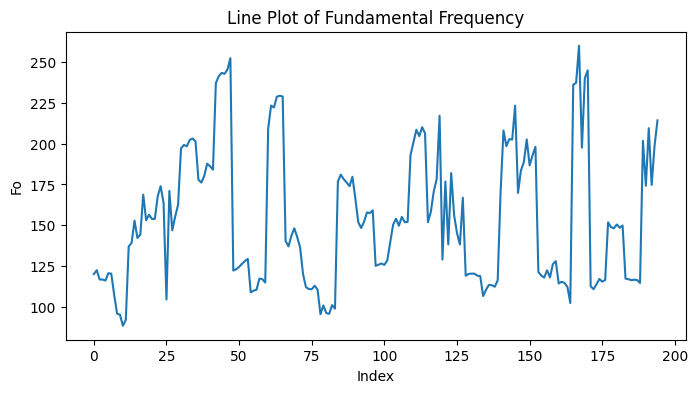

In [11]:
# Line plot of fundamental frequency
plt.figure(figsize=(8,4))
plt.plot(df["Fo"])
plt.xlabel("Index")
plt.ylabel("Fo")
plt.title("Line Plot of Fundamental Frequency")
plt.show()


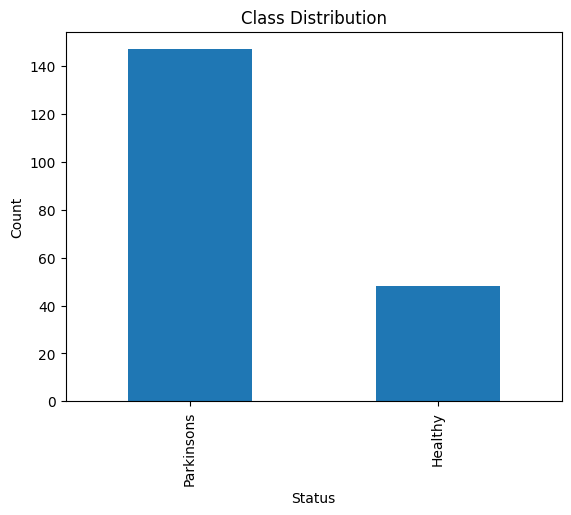

In [12]:
# Bar plot of class distribution
df["status"].value_counts().plot(kind="bar")
plt.xlabel("Status")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()


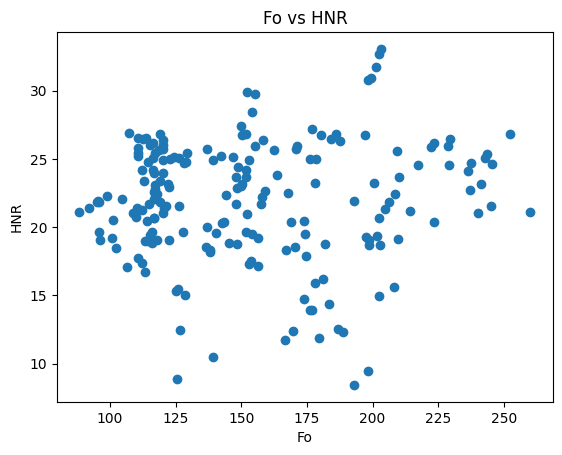

In [13]:
# Scatter plot between Fo and HNR
plt.scatter(df["Fo"], df["HNR"])
plt.xlabel("Fo")
plt.ylabel("HNR")
plt.title("Fo vs HNR")
plt.show()


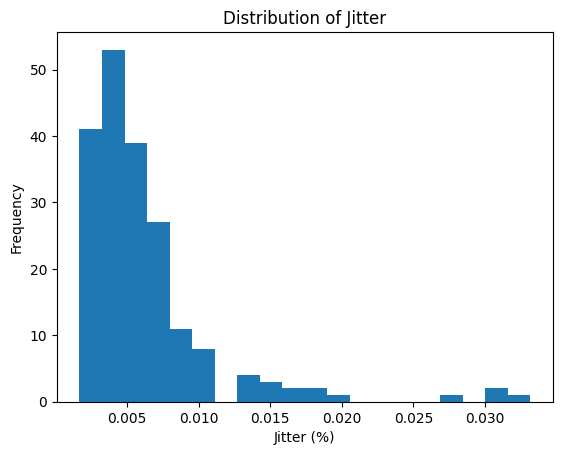

In [14]:
# Histogram of jitter
plt.hist(df["MDVP:Jitter(%)"], bins=20)
plt.xlabel("Jitter (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Jitter")
plt.show()


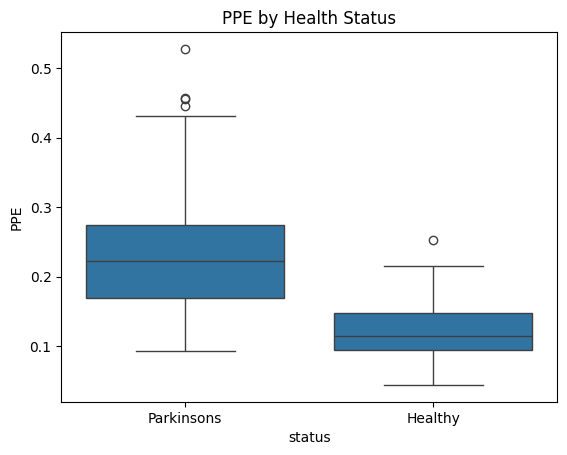

In [15]:
# Boxplot of PPE by status
sns.boxplot(x="status", y="PPE", data=df)
plt.title("PPE by Health Status")
plt.show()


In [16]:
# Display cleaned dataset
df.head()


,name,Fo,Fhi,Flo,MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,Parkinsons,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,Parkinsons,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,Parkinsons,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,Parkinsons,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,Parkinsons,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
